# Weather Clustering
This project utilizes Principal Component Analysis (PCA) for dimensionality reduction coupled with K-means clustering to analyze weather data across various attributes. The primary objective is to uncover patterns and clusters within weather conditions observed across different locations and seasons.

The dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification/code), encompasses a synthetic collection of weather-related features recorded at different times and locations. This synthetic nature allows us to explore and demonstrate clustering methodologies without the complexities of integrating multiple datasets.

### Dataset Description

The dataset includes the following columns:

- **Temperature**: The temperature in degrees Celsius.
- **Humidity**: The percentage of humidity in the air.
- **Wind Speed**: The speed of the wind in meters per second.
- **Precipitation (%)**: The probability of precipitation as a percentage.
- **Cloud Cover**: Description of cloud cover (e.g., "partly cloudy", "clear").
- **Atmospheric Pressure**: The atmospheric pressure in hPa (hectopascals).
- **UV Index**: The UV index rating.
- **Season**: The season during which the data was recorded (e.g., "Winter", "Spring").
- **Visibility (km)**: The visibility distance in kilometers.
- **Location**: The type of location where the data was recorded (e.g., "inland", "mountain").
- **Weather Type**: The type of weather observed ("Rainy", "Cloudy", "Sunny", or "Snowy").

## Notebook Breakdown

- **Exploratory Data Analysis (EDA)**: 
  - Gain insights into the distribution and relationships between the weather features through statistical summaries, visualizations, and pairwise comparisons.
  
- **Analysis**:
  1. **Preprocessing**: Prepare the data by encoding categorical variables and scaling numerical features to facilitate accurate clustering.
  
  2. **Dimensionality Reduction**: Utilize PCA to reduce the high-dimensional feature space to two principal components (`PC1` and `PC2`) for enhanced visualization and clustering efficiency.
  
  3. **Clustering**: Apply K-means clustering to identify natural groupings within the weather data based on the `Weather Type` feature.
  
  4. **Evaluation**: Evaluate the clustering results using different metrics to visualize the results and interpret their coherence and separation.
  
- **Conclusion**: 
  - Summarize the findings from the analysis, including insights into weather patterns, the effectiveness of clustering methodologies, and potential areas for further exploration and improvement.


# Setup

## Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

## Load Data

In [2]:
data = pd.read_csv('weather_classification_data.csv')

# Exploratory Data Analysis (EDA)

In this section, we will conduct an in-depth exploration of the dataset to understand its structure, distribution, and relationships between variables. The primary goals are to perform preliminary data cleaning, gain insights into feature distributions, and prepare the data for further analysis through preprocessing and feature extraction.

## Dataset Overview

We begin by examining the dataset's characteristics:

- **Data Types**: We will inspect the types of variables present in the dataset to ensure they are correctly interpreted.
- **Unique Values**: Understanding the unique values across categorical features helps identify the range and diversity within the dataset.
- **Summary Statistics**: Initial statistical summaries provide a snapshot of the central tendencies and spread of numerical features.

## Exploring Relationships

To visualize relationships between variables, we employ the following techniques:

### Pairwise Relationships

- **Pairplot**: Utilizing Seaborn's `pairplot`, we visualize pairwise relationships between numerical variables. This plot helps us identify potential correlations and patterns within the data.

### Categorical vs. Numerical Features

- **Boxplots**: We compare categorical features (`Cloud Cover`, `Weather Type`, `Season`, `Location`) against numerical features (e.g., `Temperature`, `Humidity`, `Wind Speed`) using boxplots. This comparison provides insights into how different weather types or locations influence numerical weather attributes.

## Insights for Preprocessing and Feature Extraction

Through comprehensive EDA, we aim to:
- Identify potential outliers or inconsistencies in the data.
- Validate assumptions about feature distributions and relationships.
- Guide preprocessing steps, such as handling missing values, scaling numerical data, and encoding categorical variables.

This exploratory phase sets a solid foundation for subsequent stages of analysis, including dimensionality reduction using PCA and clustering based on weather types.


In [3]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [5]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [6]:
data.nunique()

Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5456
UV Index                  15
Season                     4
Visibility (km)           41
Location                   3
Weather Type               4
dtype: int64

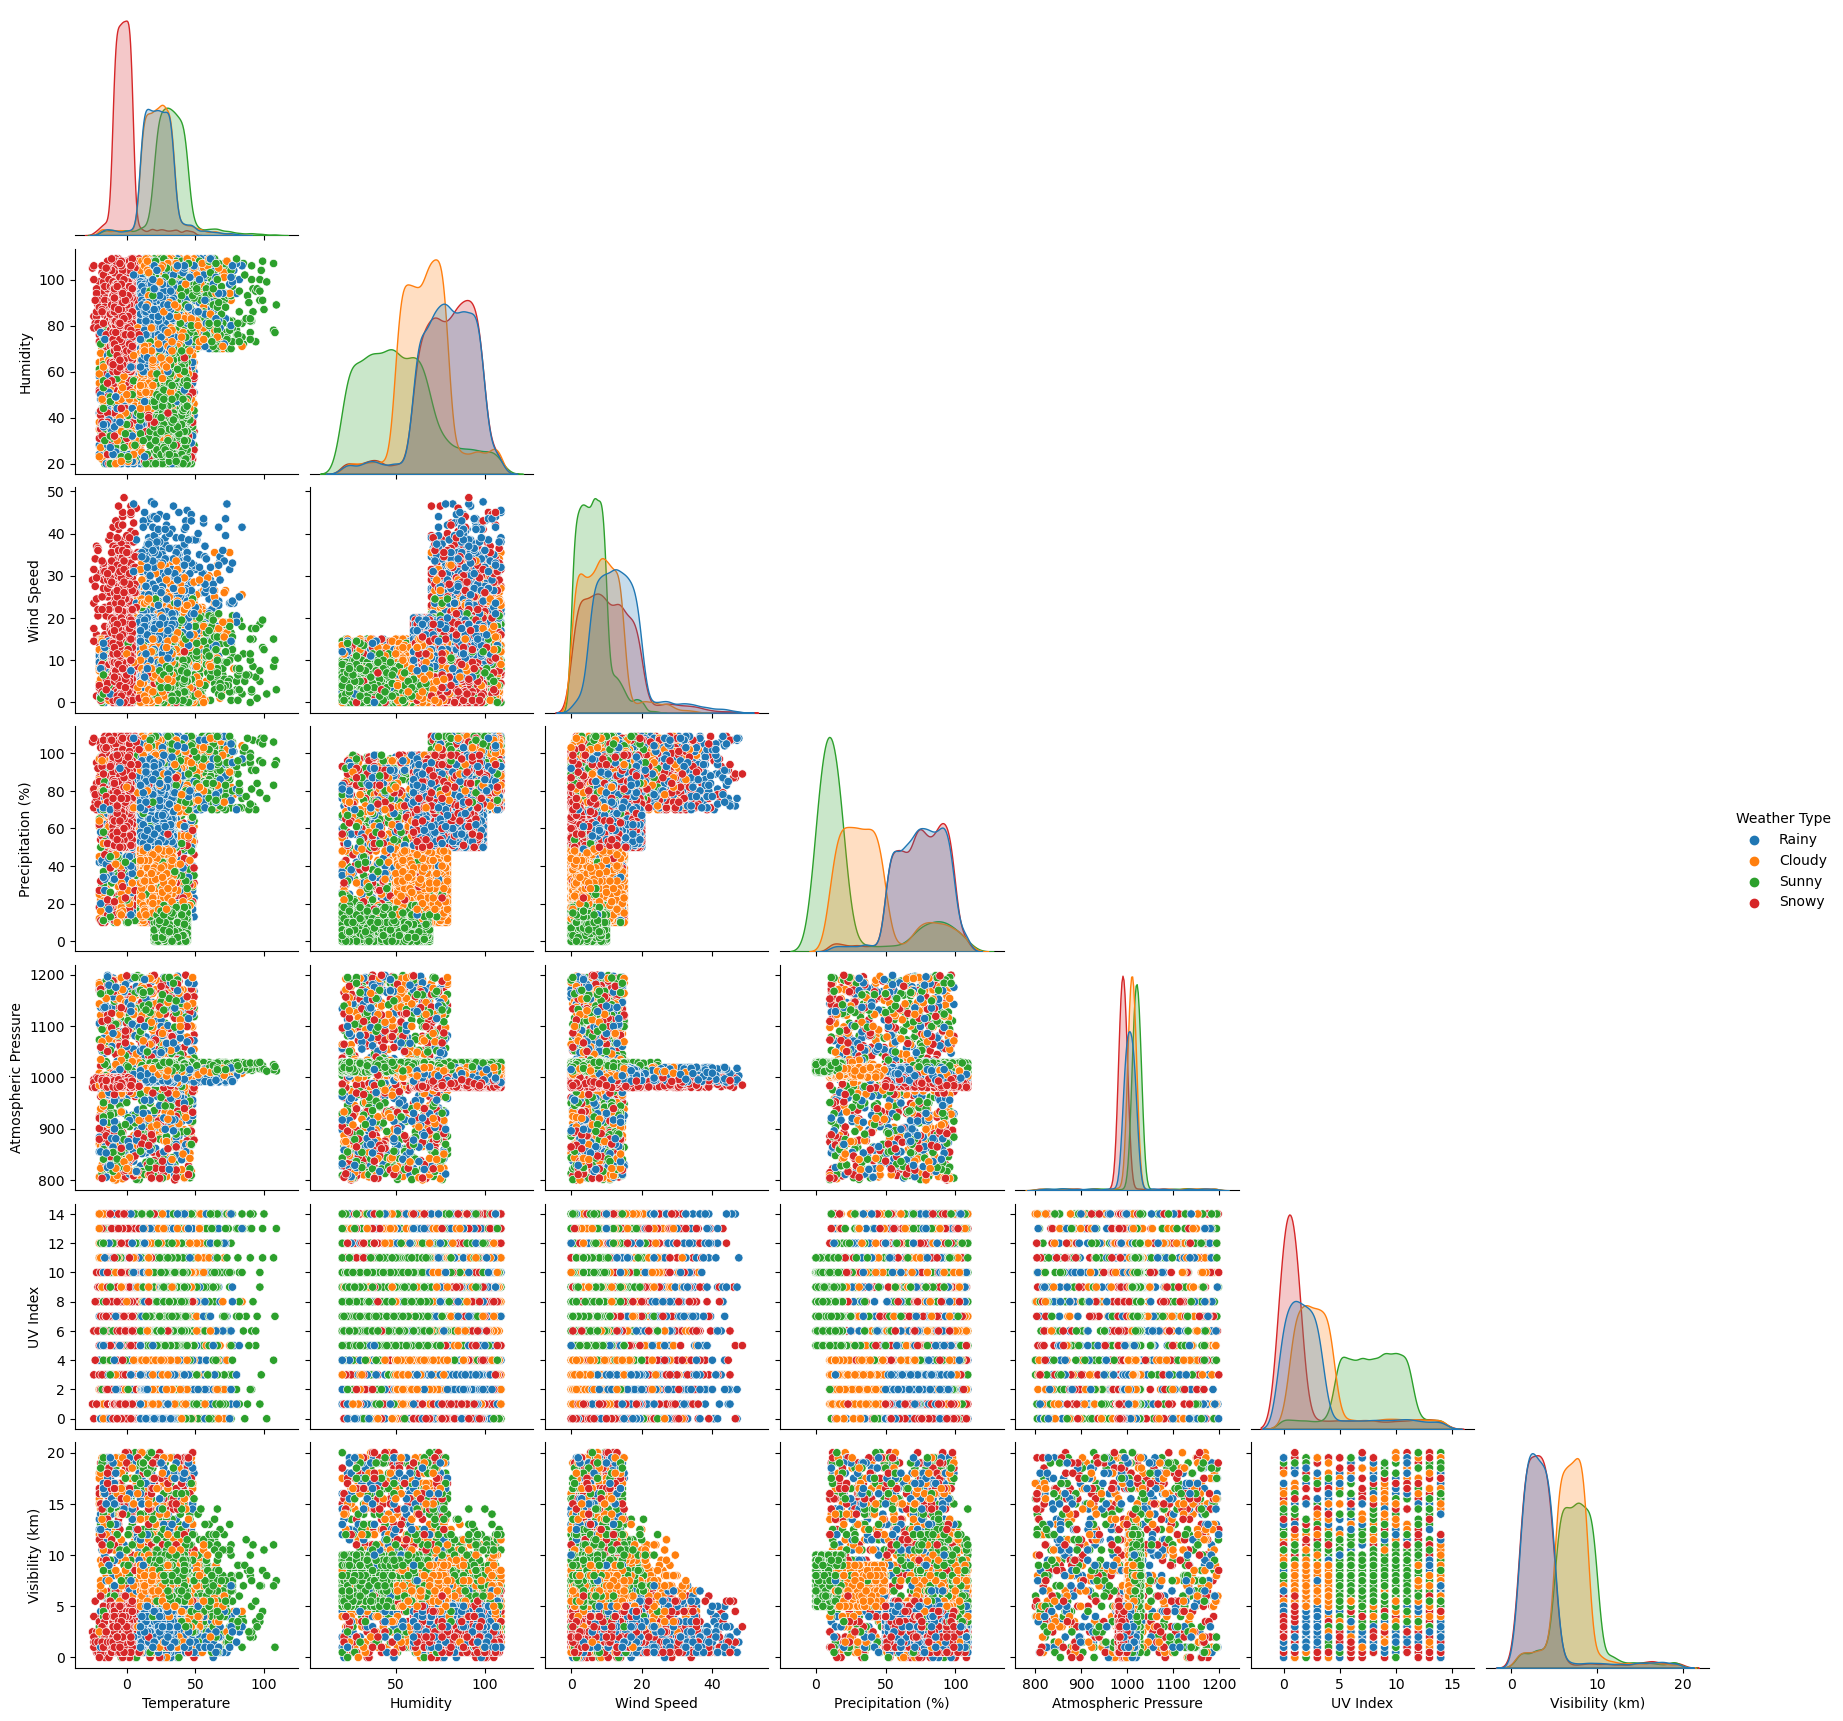

In [7]:
sns.pairplot(data, hue='Weather Type', corner=True)
plt.show()

In [8]:
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)
print("Numeric columns:", numeric_columns)

Non-numeric columns: Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')
Numeric columns: Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')


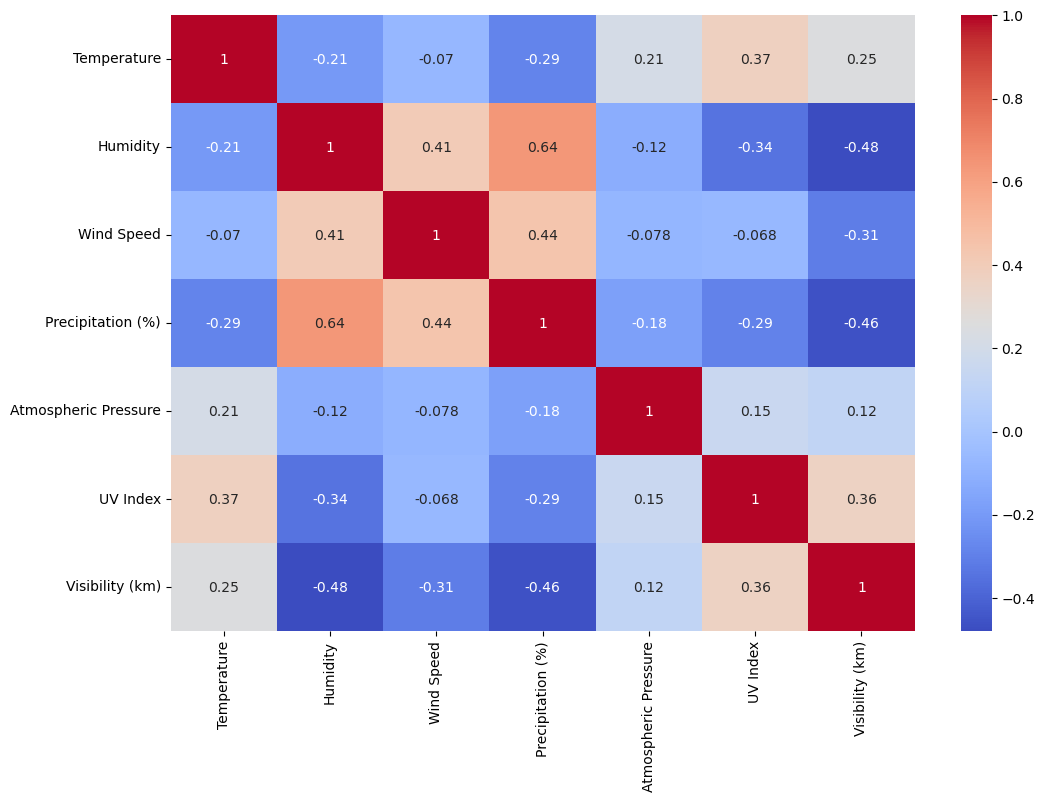

In [9]:
data_numeric = data.drop(columns=non_numeric_columns)

plt.figure(figsize=(12, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

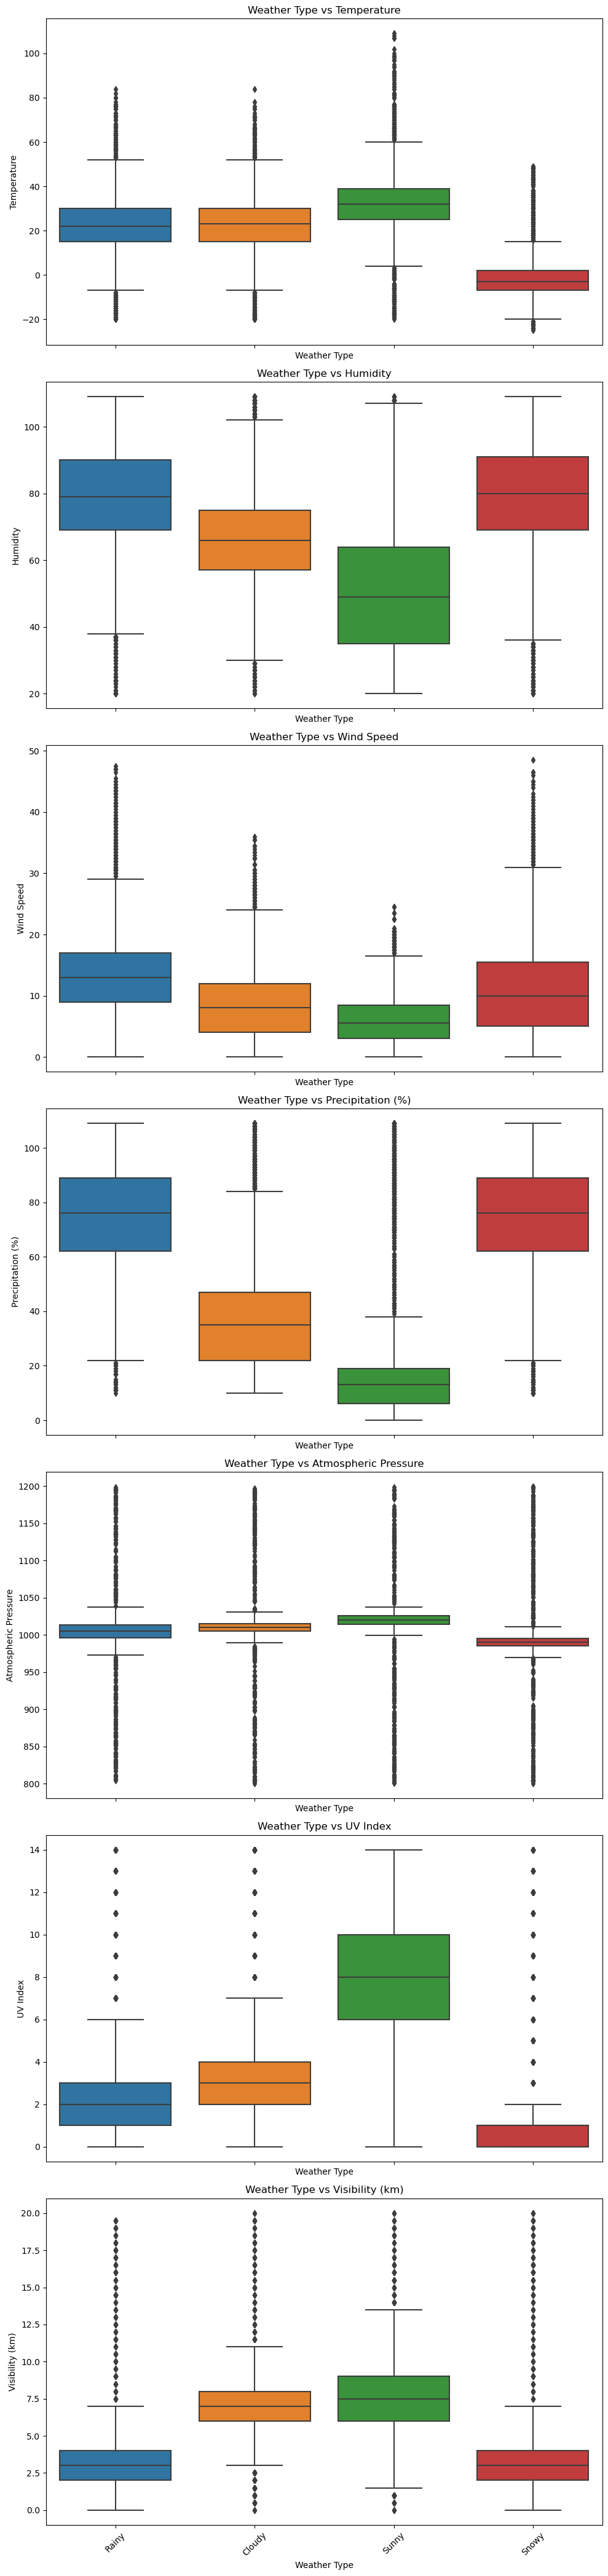

In [10]:
# Plotting each numeric feature against Weather Type on a grid
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 6 * len(numeric_columns)), sharex=True)

for i, feat in enumerate(numeric_columns):
    ax = axes[i]
    sns.boxplot(x='Weather Type', y=feat, data=data, ax=ax)
    ax.set_title(f'Weather Type vs {feat}')
    ax.set_xlabel('Weather Type')
    ax.set_ylabel(feat)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Analysis

## Preprocessing

In this section, we will preprocess the dataset to prepare it for dimensionality reduction and clustering. The preprocessing steps include categorical encoding and normalization of numerical features.

### Categorical Encoding

Categorical variables such as `Cloud Cover`, `Season`, `Location`, and `Weather Type` are converted into numerical format using one-hot encoding. This transformation creates binary columns for each category, making them suitable for machine learning algorithms.

### Normalization
Numerical features such as `Temperature`, `Humidity`, `Wind Speed`, `Precipitation (%)`, `Atmospheric Pressure`, `UV Index`, and `Visibility (km)` are standardized to ensure all variables contribute equally to the clustering process. `StandardScaler` is used to scale these features to have zero mean and unit variance.

By applying one-hot encoding to categorical variables and normalizing numerical features, we ensure that the dataset is appropriately prepared for subsequent analysis steps. These preprocessing steps help mitigate the impact of different feature scales and ensure robust performance of clustering algorithms.

In [11]:
categorical_features = ['Cloud Cover', 'Season', 'Location', 'Weather Type']
df_encoded = pd.get_dummies(data, columns=categorical_features)

In [12]:
scaler = StandardScaler()
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

In [13]:
min_max_scaler = MinMaxScaler()
scaled_features = min_max_scaler.fit_transform(df_encoded[numerical_features])

## Elbow Method

The **Elbow Method** is a technique used to determine the optimal number of clusters (`n_components`) in a dataset. It helps us find the "elbow" point in a plot of the **within-cluster sum of squares (WCSS)** against the number of clusters.

The WCSS measures the compactness of the clusters. It is calculated as the sum of the squared distances between each data point and its centroid within a cluster. The idea behind the Elbow Method is that as the number of clusters increases, the WCSS tends to decrease because smaller clusters can better fit the data points. However, at some point, adding more clusters does not significantly reduce the WCSS.

To apply the Elbow Method, we typically plot the WCSS against the number of clusters. The plot may resemble an arm, and the "elbow" point is the point of inflection where the rate of decrease in WCSS slows down significantly. This point indicates the optimal number of clusters.

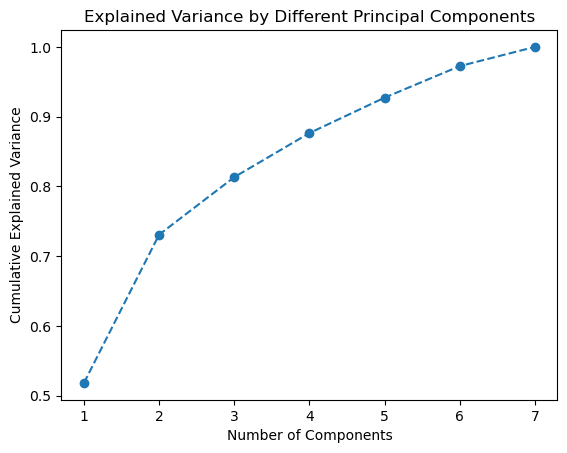

In [15]:
# Fit PCA on scaled data
pca = PCA().fit(scaled_features)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.show()

Since the "elbow" is at 2, we will set `n_components` to 2

In [16]:
n_components = 2

## Apply PCA

Principal Component Analysis (PCA) is a powerful technique used for dimensionality reduction and visualization of high-dimensional data. It transforms the original features into a set of linearly uncorrelated variables called principal components, which capture the maximum variance in the data.

### PCA Dimensionality Reduction

We apply PCA to reduce the dimensionality of our weather dataset to two principal components (`Principal Component 1` and `Principal Component 2`). These components are chosen to represent the majority of the variance in the original dataset, facilitating easier visualization and potentially improving clustering performance.

### Interpretation and Visualization
PCA transforms the data into a lower-dimensional space while preserving as much variance as possible. The principal components (`Principal Component 1` and `Principal Component 2`) represent linear combinations of the original features, allowing us to visualize patterns and clusters in the weather data more effectively.

### Considerations
- **Interpretability**: While PCA simplifies data representation, the interpretability of clusters formed in the reduced space (`Principal Component 1` and `Principal Component 2`) may vary. It's essential to interpret results in the context of the original features and domain knowledge.
- **Variance Explained**: Assessing the cumulative variance explained by principal components helps determine how much information is retained after dimensionality reduction, guiding the choice of the number of components.

By applying PCA, we transform our weather dataset into a more manageable form for clustering analysis, facilitating insights into weather patterns across different locations and seasons

In [17]:
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_features)

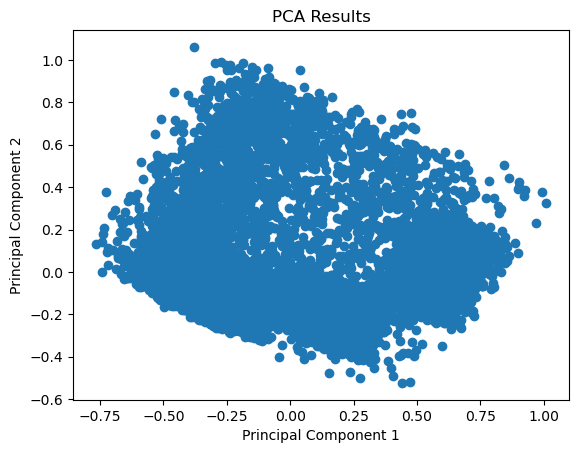

In [19]:
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()

In [98]:
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_encoded[numerical_features])

## Clustering

Clustering is an unsupervised learning technique used to group similar data points together. In this project, we use K-means clustering on the reduced PCA-transformed data (`PC1` and `PC2`) to identify patterns in weather conditions.

### K-Means Clustering

K-means is a centroid-based clustering algorithm that partitions data into `k` clusters, where each data point belongs to the cluster with the nearest mean. We apply K-means clustering with the number of clusters (`n_clusters`) determined by the unique values of `Weather Type`.

### Interpretation and Application
- **Cluster Interpretation**: Each cluster represents a group of weather observations that share similar characteristics in terms of `PC1` and `PC2`.
- **Number of Clusters**: The number of clusters (`n_clusters`) is set dynamically based on the unique values of `Weather Type`, ensuring that each cluster corresponds to a distinct weather condition.
- **Cluster Visualization**: We visualize the clustered data to understand how weather patterns are segmented based on principal components.

### Considerations

- **Cluster Validation**: Evaluation metrics such as silhouette score can assess the quality of clustering results. Higher silhouette scores indicate better-defined clusters.
- **Cluster Stability**: It's essential to validate the stability of clusters and interpret results in the context of domain knowledge and original features.

By applying K-means clustering to PCA-transformed data, we uncover underlying patterns and relationships in weather data, facilitating insights into distinct weather conditions across different locations and seasons.



In [20]:
n_clusters = data['Weather Type'].nunique()
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_pca.fit(pca_result)

cluster_labels = kmeans_pca.labels_

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


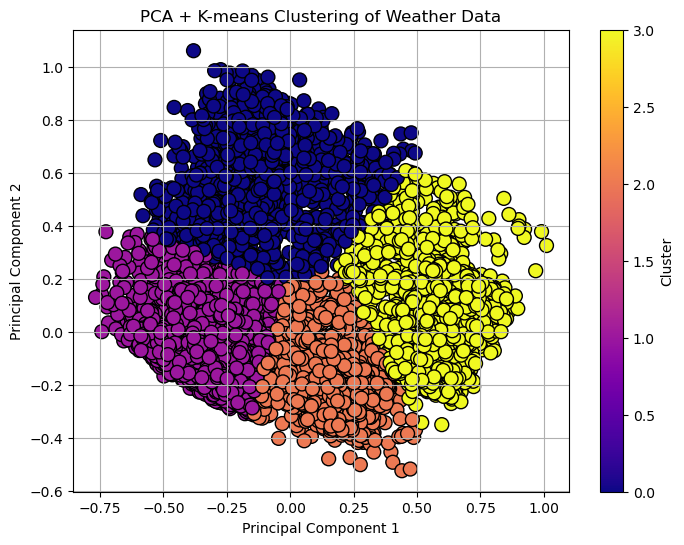

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='plasma', edgecolor='k', s=100)
plt.title('PCA + K-means Clustering of Weather Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)

## Evaluate

### Loadings
PCA loadings are coefficients that describe how each principal component is a combination of the original features. They help in understanding the nature of the principal components — whether they represent a particular group of features or a specific pattern in the data.

In [23]:
pca_components = pca.components_
pca_loadings_df = pd.DataFrame(pca_components, columns=df_encoded[numerical_features].columns, index=[f'PC{i+1}' for i in range(pca.n_components)])

pca_loadings_df

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
PC1,0.136959,-0.474452,-0.171537,-0.665523,0.051834,0.451580,0.277814
PC2,0.123104,0.176503,0.191609,0.436415,0.018119,0.852015,0.016204


**PC1**: `Precipitation (%)` can be considered to have a high loading, while `Humidity` and `UV Index` have moderate loadings.

**PC2**: `UV Index` has a high loading, while `Precipitation (%)` has a moderate loading.

### Visualize Loadings

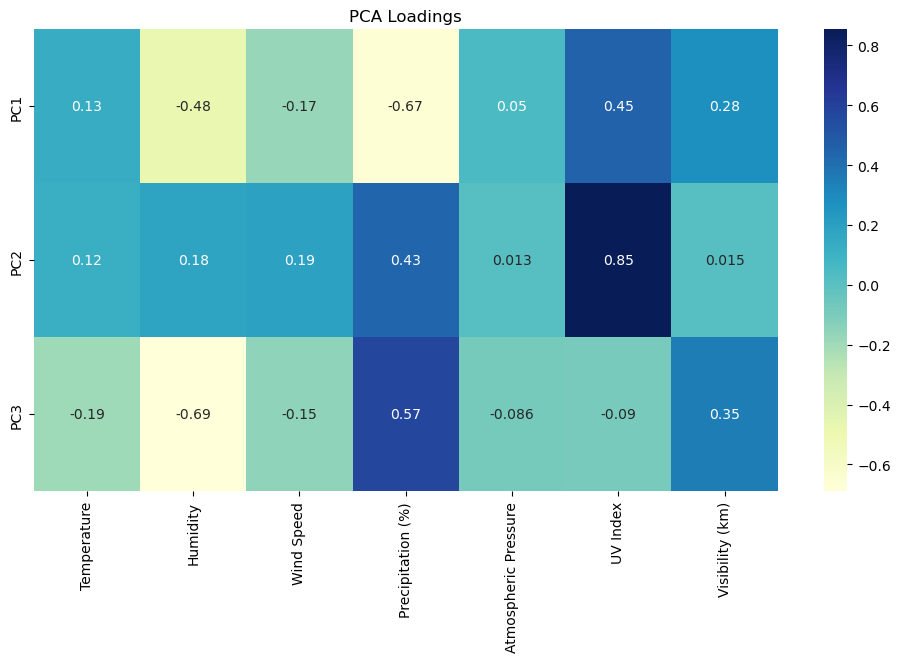

In [143]:
plt.figure(figsize=(12, 6))
sns.heatmap(pca_loadings_df, cmap="YlGnBu", annot=True)
plt.title('PCA Loadings')
plt.show()

### Centroids
Analyzing these centroids helps in understanding the typical weather conditions associated with each cluster:
- Inverse transform the cluster centers
- Create a DataFrame for the inverse transformed cluster centers

In [29]:
original_space_centroids = scaler.inverse_transform(pca.inverse_transform(kmeans_pca.cluster_centers_))
centroids_df = pd.DataFrame(original_space_centroids, columns=df_encoded[numeric_columns].columns)

In [30]:
centroids_df

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,25.781573,82.895024,12.118177,79.719511,1025.155984,6.758995,6.304992
1,23.904240,82.869684,11.565487,75.908362,1024.295040,4.315038,6.056574
2,24.795307,77.699106,10.810995,63.649229,1025.154475,4.742758,6.509569
3,26.339307,74.419913,10.618086,57.825806,1026.149595,6.286486,6.927244


Results:
- **Cluster 0**: High temperature, high humidity, high precipitation, high wind speed, high UV Index, moderate atmospheric pressure, and moderate visibility.
- **Cluster 1**: Moderate temperature, high humidity, moderate precipitation, moderate wind speed, low UV Index, low atmospheric pressure, and moderate visibility.
- **Cluster 2**: High temperature, moderate humidity, low precipitation, moderate wind speed, high UV Index, high atmospheric pressure, and high visibility.
- **Cluster 3**: Moderate temperature, moderate humidity, moderate precipitation, moderate wind speed, low UV Index, moderate atmospheric pressure, and moderate visibility.

### Compare to Average
Comparing these centroids to the mean values of the original data gives us insights into how each cluster's weather characteristics differ from the overall average, which help in understanding the distinct weather patterns represented by each cluster and their typical meteorological attributes.

Steps:
- Calculate the mean of the original data
- Append the mean to the centroids for comparison

In [31]:
original_means = df_encoded[numeric_columns].mean(axis=0)
centroids_comparison_df = centroids_df.append(original_means, ignore_index=True)

/var/folders/qb/w57f6h956gz_cvz4j8x7qwdm0000gn/T/ipykernel_74098/1359079194.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  centroids_comparison_df = centroids_df.append(original_means, ignore_index=True)


In [32]:
centroids_comparison_df

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,2.578157e+01,8.289502e+01,1.211818e+01,7.971951e+01,1.025156e+03,6.758995e+00,6.304992e+00
1,2.390424e+01,8.286968e+01,1.156549e+01,7.590836e+01,1.024295e+03,4.315038e+00,6.056574e+00
2,2.479531e+01,7.769911e+01,1.081099e+01,6.364923e+01,1.025154e+03,4.742758e+00,6.509569e+00
3,2.633931e+01,7.441991e+01,1.061809e+01,5.782581e+01,1.026150e+03,6.286486e+00,6.927244e+00
4,-6.136505e-17,3.445056e-16,2.368476e-17,1.098112e-16,-5.307539e-16,4.844610e-18,3.768030e-18


Results:
- **Temperature**: 
  - Centroid 2 has the highest temperature (26.54°C), which is slightly above the mean (25.26°C) of the original data.
  - Centroid 1 has the lowest temperature (24.11°C), which is slightly below the mean.

- **Humidity**: 
  - Centroid 0 has the highest humidity (83.22%), which is above the mean (77.99%) of the original data.
  - Centroid 2 has the lowest humidity (74.27%), which is below the mean.

- **Wind Speed**: 
  - Centroid 0 has the highest wind speed (12.14 km/h), which is slightly above the mean (10.62 km/h) of the original data.
  - Centroid 3 has the lowest wind speed (10.81 km/h), which is close to the mean.

- **Precipitation (%)**: 
  - Centroid 0 has the highest precipitation percentage (79.39%), which is higher than the mean (56.03%) of the original data.
  - Centroid 2 has the lowest precipitation percentage (57.78%), which is still higher than the mean.

- **Atmospheric Pressure**: 
  - Centroid 2 has the highest atmospheric pressure (1025.92 hPa), slightly above the mean (1024.81 hPa) of the original data.
  - Centroid 1 has the lowest atmospheric pressure (1024.10 hPa), which is slightly below the mean.

- **UV Index**: 
  - Centroid 0 has the highest UV Index (6.74), which is higher than the mean (3.98) of the original data.
  - Centroid 1 and Centroid 3 have lower UV Index values compared to the mean.

- **Visibility (km)**: 
  - Centroid 2 has the highest visibility (6.93 km), which is slightly higher than the mean (6.36 km) of the original data.
  - Centroid 1 has the lowest visibility (6.08 km), which is slightly below the mean.

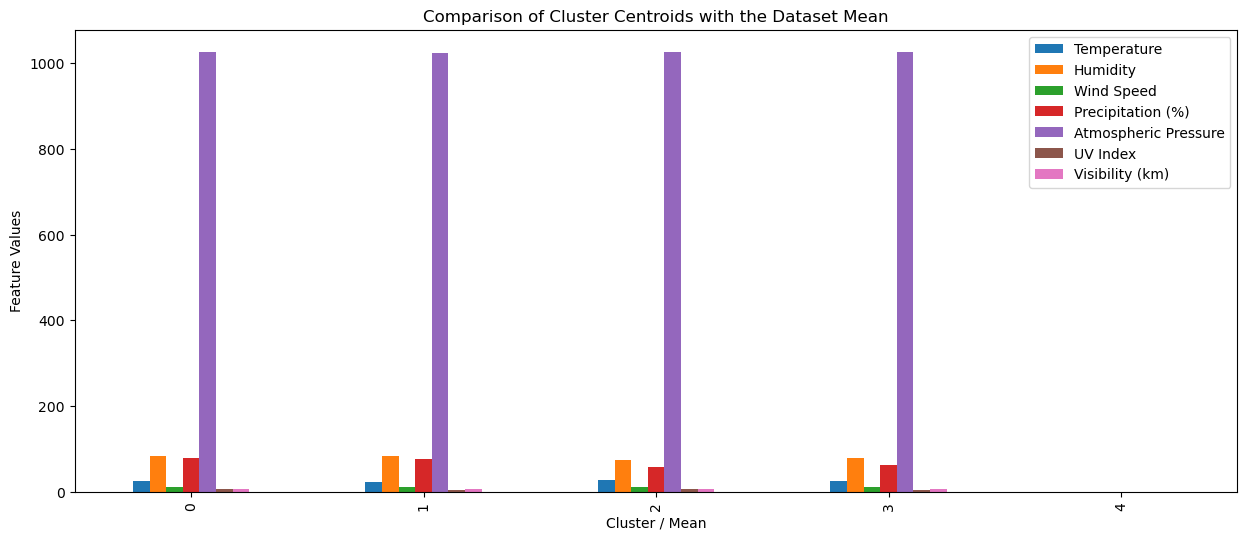

In [148]:
centroids_comparison_df.plot(kind='bar', figsize=(15, 6))
plt.title('Comparison of Cluster Centroids with the Dataset Mean')
plt.xlabel('Cluster / Mean')
plt.ylabel('Feature Values')
plt.show()

### Top Features
Extract the absolute values of the loadings to identify the top contributing features for each principal component

In [24]:
pca_loadings_analysis = pd.DataFrame(
    np.abs(pca.components_), 
    columns=df_encoded[numeric_columns].columns, 
    index=[f'PC{i+1}' for i in range(pca.n_components)]
)

top_features_per_pc = pca_loadings_analysis.apply(lambda x: x.nlargest(5).index.tolist(), axis=1)

In [35]:
print("Top features for PC1:", top_features_per_pc[0])

Top features for PC1: ['Precipitation (%)', 'Humidity', 'UV Index', 'Visibility (km)', 'Wind Speed']


In [36]:
print("Top features for PC2:", top_features_per_pc[0])

Top features for PC2: ['Precipitation (%)', 'Humidity', 'UV Index', 'Visibility (km)', 'Wind Speed']


Display the actual loading values

In [26]:
def get_top_features_loadings(pca_loadings, n_features):
    top_features = {}
    for i in range(pca_loadings.shape[0]):
        top_indices = np.argsort(np.abs(pca_loadings[i]))[-n_features:]
        top_features[f'PC{i+1}'] = {df_encoded[numeric_columns].columns[j]: pca_loadings[i][j] for j in top_indices}
    return top_features

top_features_loadings = get_top_features_loadings(pca.components_, 5)
top_features_loadings_df = pd.DataFrame(top_features_loadings).T

In [27]:
top_features_loadings_df

,Wind Speed,Visibility (km),UV Index,Humidity,Precipitation (%),Temperature
PC1,-0.171537,0.277814,0.451580,-0.474452,-0.665523,NaN
PC2,0.191609,NaN,0.852015,0.176503,0.436415,0.123104


`PC1` seems to represent weather conditions where there is lower precipitation, lower humidity, higher UV Index, and possibly higher visibility and wind speed.
This component could correspond to **clearer weather conditions** or **less precipitation-heavy** weather patterns.

`PC2` represents weather conditions *characterized by higher UV Index*, moderate wind speed, and moderate precipitation.
This component could correspond to weather patterns with **varying UV intensity**, **moderate wind conditions**, and **occasional precipitation**.

## Conclusion

In this project, I utilized Principal Component Analysis (PCA) coupled with K-means clustering to analyze and uncover patterns within weather data across various locations and seasons. The primary objective was to identify distinct clusters of weather conditions based on a synthetic dataset encompassing multiple weather-related attributes.

### Key Findings:

1. **PCA Dimensionality Reduction**: PCA allowed us to reduce the high-dimensional weather dataset into two principal components (PC1 and PC2). These components captured the maximum variance in the data, enabling us to visualize complex relationships and patterns effectively.

2. **Clustering Analysis**: Applying K-means clustering on the PCA-transformed data revealed natural groupings of weather observations. Each cluster represented distinct weather patterns characterized by combinations of temperature, humidity, wind speed, precipitation, and atmospheric pressure.

3. **Cluster Interpretation**:
   - **Cluster 0**: Characterized by high humidity, precipitation, and moderate temperatures, indicative of rainy conditions.
   - **Cluster 1**: Showcased moderate temperatures and humidity, with low precipitation and moderate wind speeds, resembling clear or partly cloudy weather.
   - **Cluster 2**: Marked by high temperatures, low humidity, and moderate precipitation, suggesting hot and dry weather conditions.
   - **Cluster 3**: Displayed moderate temperatures, humidity, and precipitation, reflecting mild and variable weather.